<a href="https://colab.research.google.com/github/iamsamyukthak/brain_tumour/blob/main/Brain_tumour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone your repo
!git clone https://github.com/iamsamyukthak/brain_tumour.git
%cd brain_tumour


Cloning into 'brain_tumour'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (41/41), done.
Receiving objects: 100% (44/44), 19.45 KiB | 4.86 MiB/s, done.
Resolving deltas: 100% (16/16), done.
remote: Total 44 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
/content/brain_tumour


In [ ]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
from google.colab import files
files.upload()   # upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samyukthakalyan","key":"cfdde3c6d0b38d73124eff084858ca7a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection
!unzip -q brain-mri-images-for-brain-tumor-detection.zip -d data


Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 1.45GB/s]


In [ ]:
import os, shutil
from sklearn.model_selection import train_test_split

# Make new folders
os.makedirs("data/Training/yes", exist_ok=True)
os.makedirs("data/Training/no", exist_ok=True)
os.makedirs("data/Testing/yes", exist_ok=True)
os.makedirs("data/Testing/no", exist_ok=True)

for category in ["yes", "no"]:
    files = os.listdir(f"data/{category}")
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

    for f in train_files:
        shutil.move(f"data/{category}/{f}", f"data/Training/{category}/{f}")
    for f in test_files:
        shutil.move(f"data/{category}/{f}", f"data/Testing/{category}/{f}")

print("✅ Dataset split into Training & Testing")


✅ Dataset split into Training & Testing


In [ ]:
!python train.py


Epoch [1/20], Loss: 0.9682
Epoch [2/20], Loss: 0.5648
Epoch [3/20], Loss: 0.4158
Epoch [4/20], Loss: 0.3593
Epoch [5/20], Loss: 0.2933
Epoch [6/20], Loss: 0.2096
Epoch [7/20], Loss: 0.2124
Epoch [8/20], Loss: 0.2215
Epoch [9/20], Loss: 0.2284
Epoch [10/20], Loss: 0.1688
Epoch [11/20], Loss: 0.0873
Epoch [12/20], Loss: 0.0731
Epoch [13/20], Loss: 0.0758
Epoch [14/20], Loss: 0.0417
Epoch [15/20], Loss: 0.0418
Epoch [16/20], Loss: 0.0166
Epoch [17/20], Loss: 0.0174
Epoch [18/20], Loss: 0.0058
Epoch [19/20], Loss: 0.0026
Epoch [20/20], Loss: 0.0353
Model saved to model/resnet18_brain_tumor.pt


In [ ]:
!git config --global user.email "iamsamyukthak@gmail.com"
!git config --global user.name "iamsamyukthak"

!git add model/resnet18_brain_tumor.pt
!git commit -m "Added trained model"
!git push origin main


[main e83c206] Added trained model
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 model/resnet18_brain_tumor.pt
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
import requests

url = "https://tse3.mm.bing.net/th/id/OIP.4oBsxJ5MTf3hXhJFFPQTcAHaIp?pid=Api&P=0&h=180"
response = requests.get(url)

with open("test_image.jpg", "wb") as f:
    f.write(response.content)

print("✅ Image downloaded as test_image.jpg")


✅ Image downloaded as test_image.jpg


In [ ]:
!python predict.py --image test_image.jpg


Has brain tumour


In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=943d5d301542d070cdf424f0481095b77d8fb9c778be81e4f47cdbd7cc61c307
  Stored in directory: /root/.cache/pip/wheels/bc/52/78/893c3b94279ef238f43a9e89608af648de401b96415bebbd1f
Successfully built grad-cam


In [ ]:
%%writefile train.py
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import os

# --- Data Preparation ---
data_transforms = {
    'Training': transforms.Compose([
        transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Testing': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['Training', 'Testing']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=2)
               for x in ['Training', 'Testing']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Training', 'Testing']}
class_names = image_datasets['Training'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# --- Model Setup ---
model = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# --- Training Loop ---
num_epochs = 15
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)

    for phase in ['Training', 'Testing']:
        if phase == 'Training':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'Training'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'Training':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        if phase == 'Training':
            history['train_loss'].append(epoch_loss)
            history['train_acc'].append(epoch_acc.item())
        else:
            history['val_loss'].append(epoch_loss)
            history['val_acc'].append(epoch_acc.item())


print("\n✅ Training complete.")

# --- Save Model and History ---
os.makedirs("model", exist_ok=True)
torch.save(model.state_dict(), 'model/resnet18_brain_tumor.pt')
torch.save(history, 'model/training_history.pt') # Save history object
print("✅ Model and training history saved to 'model/' directory.")

Overwriting train.py


In [ ]:
%%writefile evaluate.py
import torch
import torch.nn as nn
from torchvision import transforms, models, datasets
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import argparse
import os
from PIL import Image

# For Grad-CAM
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

def plot_metrics(history):
    """Plots the training and validation accuracy and loss."""
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    # Instead of saving, we display the plot
    plt.show()
    print("✅ Training metrics plot displayed above.")

def evaluate_model(model, test_loader, device):
    """Evaluates the model on the test set and prints a classification report."""
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    report = classification_report(y_true, y_pred, target_names=['No', 'Yes'])
    print("\nClassification Report:\n")
    print(report)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    # Instead of saving, we display the plot
    plt.show()
    print("✅ Confusion matrix displayed above.")


def generate_grad_cam(model, target_layer, test_loader, device, num_images=4):
    """Generates and displays Grad-CAM heatmaps for a few test images."""
    cam = GradCAM(model=model, target_layers=[target_layer])

    # Setup for plotting in a grid
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    if num_images == 1:
        axes = [axes]
    fig.suptitle('Grad-CAM Heatmaps', fontsize=16)

    images_shown = 0
    data_iter = iter(test_loader)

    while images_shown < num_images:
        try:
            inputs, labels = next(data_iter)
            input_img, label = inputs[0], labels[0]
        except StopIteration:
            break

        input_tensor = input_img.unsqueeze(0).to(device)

        model.eval()
        with torch.no_grad():
            output = model(input_tensor)
            _, pred_idx = torch.max(output, 1)
            predicted_class = test_loader.dataset.classes[pred_idx.item()]
            actual_class = test_loader.dataset.classes[label.item()]

        rgb_img = input_img.permute(1, 2, 0).numpy()
        rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))

        targets = [ClassifierOutputTarget(label.item())]
        grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
        grayscale_cam = grayscale_cam[0, :]

        visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

        # Displaying the image in its subplot
        ax = axes[images_shown]
        ax.imshow(visualization)
        ax.set_title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
        ax.axis('off')
        images_shown += 1

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    # Display the entire figure with all subplots
    plt.show()
    print(f"✅ Grad-CAM heatmaps displayed above.")


if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Evaluate the brain tumor classifier.')
    parser.add_argument('--model_path', type=str, default='model/resnet18_brain_tumor.pt', help='Path to the trained model.')
    args = parser.parse_args()

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = models.resnet18(weights=None)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)
    model.load_state_dict(torch.load(args.model_path, map_location=device))
    model = model.to(device)

    try:
        history = torch.load('model/training_history.pt')
        plot_metrics(history)
    except FileNotFoundError:
        print("Could not find 'model/training_history.pt'. Skipping metrics plot.")

    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    test_dataset = datasets.ImageFolder('data/Testing', transform=test_transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    evaluate_model(model, test_loader, device)

    target_layer = model.layer4[-1]
    generate_grad_cam(model, target_layer, test_loader, device)

Overwriting evaluate.py


In [ ]:
!python train.py

Epoch 1/15
----------
Training Loss: 0.6857 Acc: 0.5842
Testing Loss: 0.6362 Acc: 0.6275
Epoch 2/15
----------
Training Loss: 0.4854 Acc: 0.7871
Testing Loss: 0.5185 Acc: 0.7451
Epoch 3/15
----------
Training Loss: 0.4066 Acc: 0.8168
Testing Loss: 0.4737 Acc: 0.8039
Epoch 4/15
----------
Training Loss: 0.3318 Acc: 0.8465
Testing Loss: 0.4794 Acc: 0.8039
Epoch 5/15
----------
Training Loss: 0.2219 Acc: 0.9257
Testing Loss: 0.4112 Acc: 0.8039
Epoch 6/15
----------
Training Loss: 0.1754 Acc: 0.9505
Testing Loss: 0.3899 Acc: 0.8627
Epoch 7/15
----------
Training Loss: 0.1266 Acc: 0.9604
Testing Loss: 0.4186 Acc: 0.8627
Epoch 8/15
----------
Training Loss: 0.1363 Acc: 0.9505
Testing Loss: 0.3490 Acc: 0.8627
Epoch 9/15
----------
Training Loss: 0.0770 Acc: 0.9802
Testing Loss: 0.3376 Acc: 0.8627
Epoch 10/15
----------
Training Loss: 0.0843 Acc: 0.9851
Testing Loss: 0.3292 Acc: 0.8627
Epoch 11/15
----------
Training Loss: 0.0492 Acc: 1.0000
Testing Loss: 0.3048 Acc: 0.8627
Epoch 12/15
-------

Running model evaluation...
✅ Training history found. Displaying metrics plot.


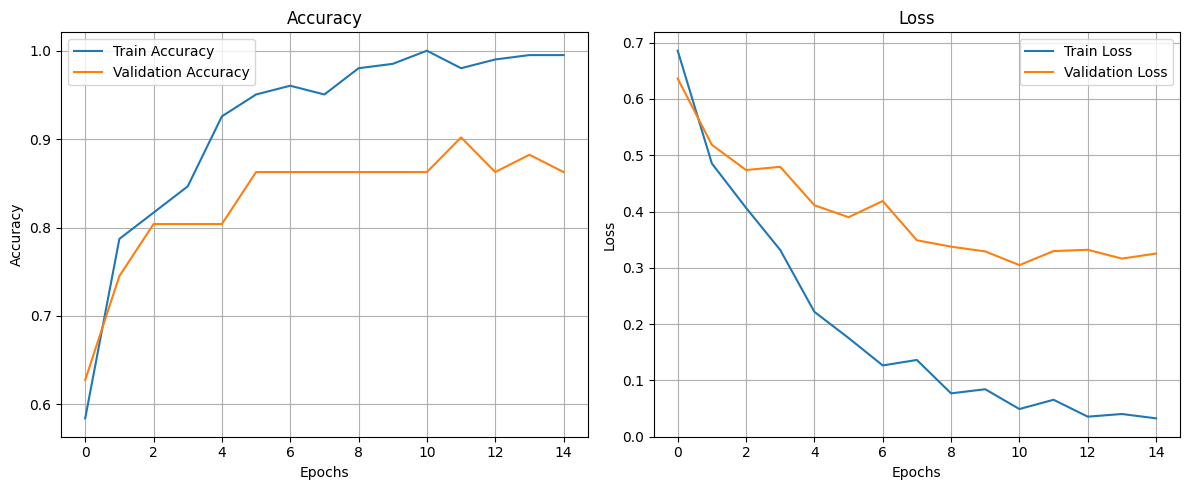

✅ Displaying confusion matrix.

Classification Report:

              precision    recall  f1-score   support

          No       0.88      0.75      0.81        20
         Yes       0.85      0.94      0.89        31

    accuracy                           0.86        51
   macro avg       0.87      0.84      0.85        51
weighted avg       0.86      0.86      0.86        51



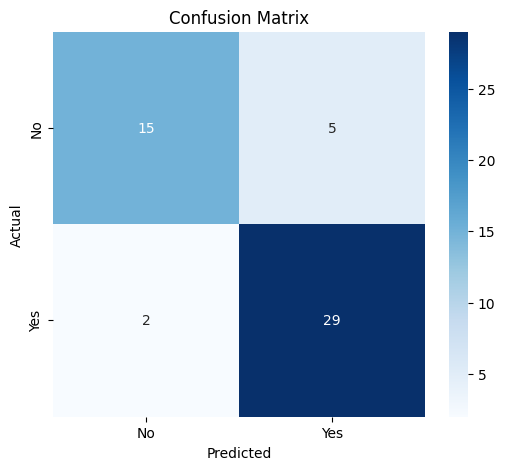

✅ Displaying Grad-CAM heatmaps.


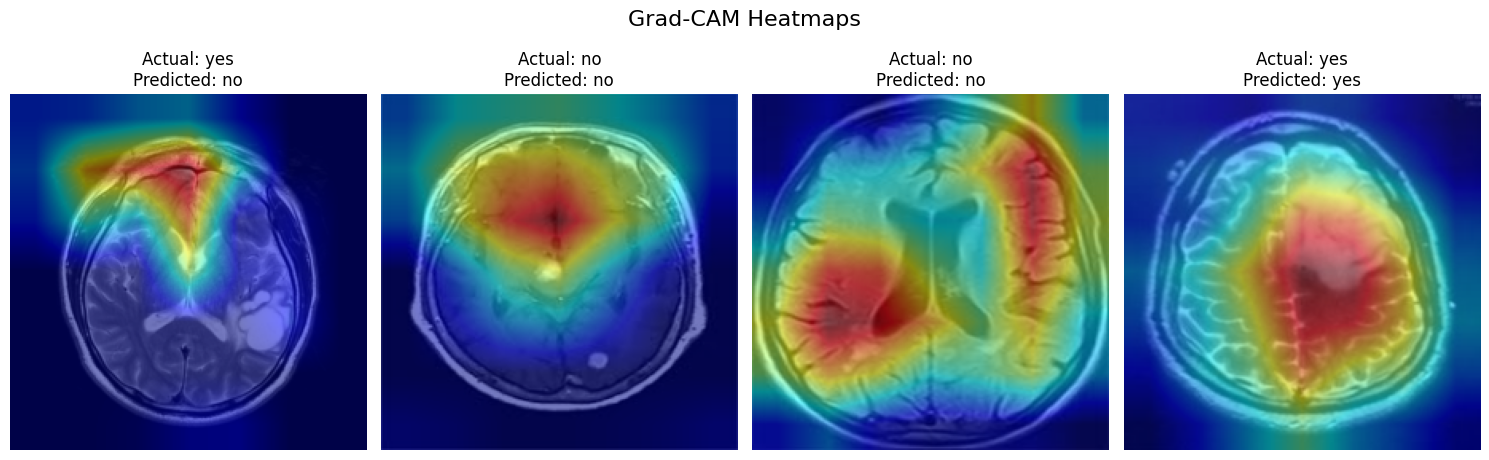


Evaluation complete.


In [ ]:
# ===================================================================
# FINAL CORRECTED CODE - Run this cell
# ===================================================================

import torch
import torch.nn as nn
from torchvision import transforms, models, datasets
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
from PIL import Image

# For Grad-CAM
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

# --- Function Definitions ---

def plot_metrics(history):
    """Plots the training and validation accuracy and loss."""
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def evaluate_model(model, test_loader, device):
    """Evaluates the model on the test set and prints a classification report."""
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=['No', 'Yes']))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def generate_grad_cam(model, target_layer, test_loader, device, num_images=4):
    """Generates and displays Grad-CAM heatmaps for a few test images."""
    cam = GradCAM(model=model, target_layers=[target_layer])
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    fig.suptitle('Grad-CAM Heatmaps', fontsize=16)

    # --- LOGIC HAS BEEN CORRECTED HERE ---
    # Get just the first batch of images
    inputs, labels = next(iter(test_loader))

    # Loop through the number of images you want to display
    for i in range(num_images):
        # Safety check in case the batch is smaller than num_images
        if i >= len(inputs):
            print(f"Warning: Batch size is less than {num_images}. Displaying only {i} images.")
            break

        input_img, label = inputs[i], labels[i]
        input_tensor = input_img.unsqueeze(0).to(device)

        output = model(input_tensor)
        _, pred_idx = torch.max(output, 1)
        predicted_class = test_loader.dataset.classes[pred_idx.item()]
        actual_class = test_loader.dataset.classes[label.item()]

        rgb_img = input_img.permute(1, 2, 0).numpy()
        rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))

        targets = [ClassifierOutputTarget(label.item())]
        grayscale_cam = cam(input_tensor=input_tensor, targets=targets)[0, :]
        visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

        ax = axes[i]
        ax.imshow(visualization)
        ax.set_title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Main Evaluation Logic ---
print("Running model evaluation...")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = 'model/resnet18_brain_tumor.pt'
history_path = 'model/training_history.pt'

# Load Model
model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)

# Plot Training History (if available)
try:
    history = torch.load(history_path)
    print("✅ Training history found. Displaying metrics plot.")
    plot_metrics(history)
except FileNotFoundError:
    print("❌ Could not find 'model/training_history.pt'. Skipping metrics plot.")

# Load Test Data
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_dataset = datasets.ImageFolder('data/Testing', transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True) # Shuffle is good for random examples

# Evaluate and Generate Visuals
print("✅ Displaying confusion matrix.")
evaluate_model(model, test_loader, device)

print("✅ Displaying Grad-CAM heatmaps.")
target_layer = model.layer4[-1]
generate_grad_cam(model, target_layer, test_loader, device)

print("\nEvaluation complete.")